In [73]:
import os
import glob
import cv2
import numpy as np 
import time
import csv
from face_model_original import FaceModelOriginal

In [74]:
path = os.path.join(os.getcwd(), 'faces/')#'celeb/')

In [75]:
recognition = FaceModelOriginal()

In [76]:
def get_distance(db_face, face_vector):
    return np.linalg.norm(np.asarray(db_face) - np.asarray(face_vector))

In [77]:
# names_dict = dict()
# reader = csv.reader(open('celeb.csv', 'r'))
# for row in reader:
#     k, v = row
#     names_dict[k] = v

# anchor_dict = {
#     'jennifer': 'jen1.jpeg',
#     'nicholas' : 'nic1.jpeg',
#     'halle' : 'Halle_Berry_0006.jpg',
#     'clint' : 'Clint_Eastwood_0005.jpg',
# }

In [78]:
names_dict = dict()
reader = csv.reader(open('names.csv', 'r'))
for row in reader:
    k, v = row
    names_dict[k] = v

anchor_dict = {
    'sondre': '51-80-3b-13.png',
    'ryan' : '28-30-4a-6.png',
    'viet' : '45-65-0d-7.png' ,
    'lawrence' : '98-220-2a-28.png' ,
}

In [79]:
anchor_images = dict()
for name, file_name in anchor_dict.items():
    img = cv2.imread(path + file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = recognition.execute(img)
    anchor_images[name] = result

In [80]:
distances = list()
identical = list()
f = open('recognition_results/frontal_resnet.csv', 'w+')
num_of_det = 0
for file_name in os.listdir(path): 
    print(file_name, name)
    name = names_dict[file_name]
    img = cv2.imread(path + file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = model.execute(img)
    if len(result):
        num_of_det +=1
        match = 'NA'
        for anchor_name, anchor_image in anchor_images.items():
            dist = get_distance(anchor_image, result)
            print(anchor_name, dist)
            if dist < 0.6:
                match = anchor_name
                if not best_match or dist < best_match[0]:
                    best_match = dist, match
            distances.append(dist)
            identical.append(1 if name == anchor_name else 0)
        f.write('%s,%s,%s,%s,%s,%f\n' % (file_name, name, anchor_dict[anchor_name], anchor_name, best_match[1], best_match[0]))
f.close()
print(num_of_det)

4-10-2a-4.png lawrence
94-145-3b-27.png lawrence
10-40-2a-10.png sondre
130-160-4a-34.png lawrence
6-15-2a-6.png ryan
17-10-3b-2.png lawrence
81-125-3b-24.png sondre
sondre 0.3976132587173757
ryan 0.6652138938787711
viet 0.82600983847115
lawrence 0.7268666166428681
119-185-3b-35.png sondre
44-65-3b-10.png sondre
89-205-2a-25.png sondre
sondre 0.6436192256130351
ryan 0.6507333701663082
viet 0.7344889378847216
lawrence 0.4860676252614556
51-80-3b-13.png lawrence
sondre 0.0
ryan 0.6378808031823018
viet 0.7150141196211179
lawrence 0.6541343223365111
34-50-3b-5.png sondre
sondre 0.40989705066605553
ryan 0.6947236728917504
viet 0.7829768614156577
lawrence 0.7307745819587694
125-180-4a-31.png sondre
sondre 0.6077657684410899
ryan 0.594953932952665
viet 0.720494645052303
lawrence 0.6526809406965777
65-65-4a-18.png ryan
129-210-3b-40.png ryan
62-60-4a-17.png sondre
sondre 0.5187136113384075
ryan 0.6267825997948022
viet 0.7477868993185048
lawrence 0.7866718565879247
77-185-2a-21.png ryan
sondre 

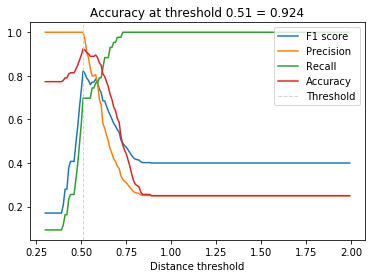

In [81]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

distances = np.array(distances)
identical = np.array(identical)

thresholds = np.arange(0.3, 2.0, 0.01)

f1_scores = [f1_score(identical, distances < t) for t in thresholds]
precision = [precision_score(identical, distances < t) for t in thresholds]
recall = [recall_score(identical, distances < t) for t in thresholds]
acc_scores = [accuracy_score(identical, distances < t) for t in thresholds]

opt_idx = np.argmax(f1_scores)
# Threshold at maximal F1 score
opt_tau = thresholds[opt_idx]
# Accuracy at maximal F1 score
opt_acc = accuracy_score(identical, distances < opt_tau)

# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, f1_scores, label='F1 score');
plt.plot(thresholds, precision, label='Precision');
plt.plot(thresholds, recall, label='Recall');
plt.plot(thresholds, acc_scores, label='Accuracy');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title(f'Accuracy at threshold {opt_tau:.2f} = {opt_acc:.3f}');
plt.xlabel('Distance threshold')
plt.legend();